In [1]:
import numpy as np
import h5py
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


C:\Users\100682329\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
boxes = h5py.File('1565289740.h5','r')['merged_detections']

min_time = boxes[0,:]
max_time = boxes[2,:]
cen_time = (min_time+max_time)/2


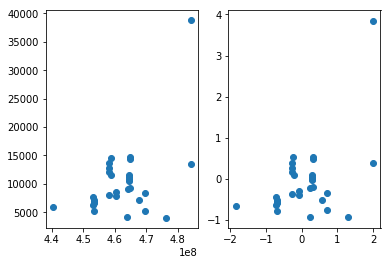

In [3]:
detects = np.where(np.logical_and(cen_time < 200, cen_time > 0))[0]

X = h5py.File('1565289740.h5','r')['features'][:,:].T
plt.subplot(121)
plt.scatter(X[detects,0],X[detects,1])
plt.subplot(122)
Xn = ((X- np.mean(X, axis=0))/np.std(X,axis=0))
plt.scatter(Xn[detects,0],Xn[detects,1])

In [4]:
def cluster_time(t0,t1):
    detects = np.where(np.logical_and(cen_time < t1, cen_time > t0))[0]
    print('num detections' + str(len(detects)))
    
    db = DBSCAN(eps = 0.5, min_samples = 5)
    db.fit(Xn[detects,2:4])

    labels = db.labels_
    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)
    print('num clusters' + str(n_clusters))
    
    fig, ax = plt.subplots()
    ax.scatter(Xn[detects,2], Xn[detects,3], c = labels)
    ax.set_xlabel('c4')
    ax.set_ylabel('c6')
    
    for i,j in enumerate(detects):
        ax.annotate(str(j), (Xn[j,2], Xn[j,3]))
    
    for l in labels_unique:
        print(detects[np.where(labels == l)])
        
        

num detections30
num clusters3


<IPython.core.display.Javascript object>


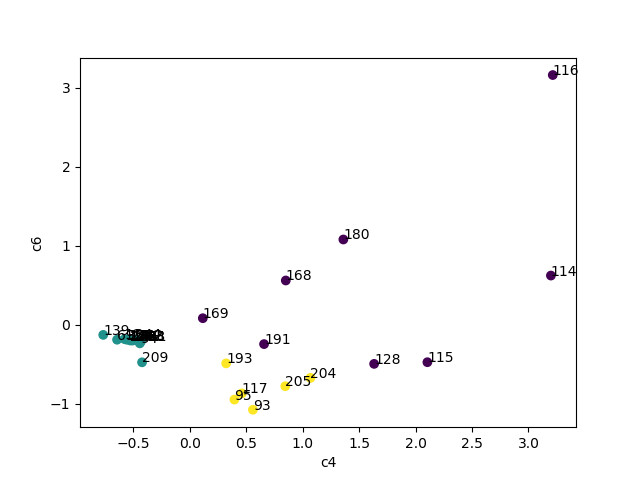

[114 115 116 128 168 169 180 191]
[ 11  17  35  56  57  69  94 139 209 241 242 243 244 251 252 282]
[ 93  95 117 193 204 205]


In [5]:
%matplotlib notebook
cluster_time(0,200)

num detections66
num clusters2


<IPython.core.display.Javascript object>


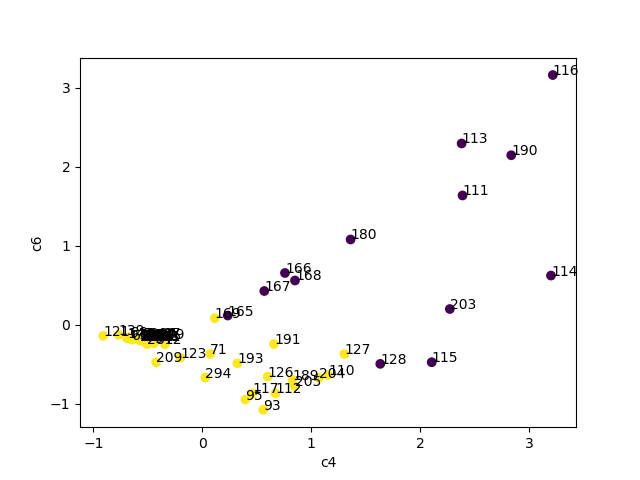

[111 113 114 115 116 128 165 166 167 168 180 190 203]
[  9  10  11  17  33  34  35  37  55  56  57  68  69  71  72  92  93  94
  95 110 112 117 121 123 126 127 137 138 139 143 147 169 179 189 191 193
 204 205 209 240 241 242 243 244 250 251 252 256 266 280 281 282 294]


In [7]:
cluster_time(0,400)

num detections262
num clusters2


<IPython.core.display.Javascript object>


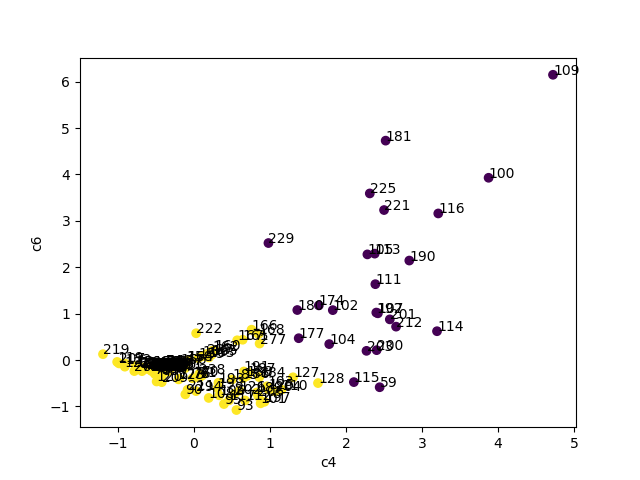

[ 59 100 102 104 105 107 109 111 113 114 115 116 174 177 180 181 190 192
 200 201 203 212 221 225 229]
[  0   1   2   3   4   7   8   9  10  11  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  47  48  49  50  51  52  53  54  55  56  57  58  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  89  90  91  92  93  94  95 101 103 106 108 110 112
 117 119 120 121 122 123 125 126 127 128 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 146 147 148 149 150 151 152 153 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 175 176 178 179
 184 185 186 187 188 189 191 193 197 198 199 202 204 205 207 208 209 211
 213 214 215 216 217 219 220 222 223 224 227 228 234 235 236 237 238 239
 240 241 242 243 244 248 249 250 251 252 253 254 255 256 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 

In [8]:
cluster_time(0,1000)

num detections196
num clusters2


<IPython.core.display.Javascript object>


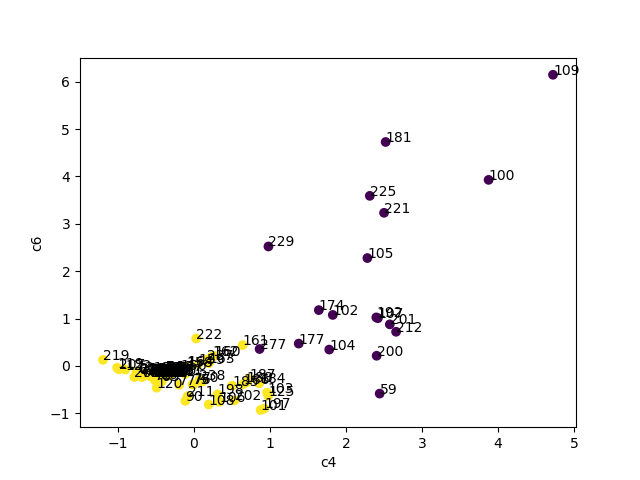

[ 59 100 102 104 105 107 109 174 177 181 192 200 201 212 221 225 229 277]
[  0   1   2   3   4   7   8  15  16  18  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  36  38  39  40  41  42  47  48  49  50  51  52
  53  54  58  61  62  63  64  65  66  67  70  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  89  90  91 101 103 106 108 119 120 122
 125 131 132 133 134 135 136 140 141 142 144 146 148 149 150 151 152 153
 155 156 157 158 159 160 161 162 163 164 170 171 172 175 176 178 184 185
 186 187 188 197 198 199 202 207 208 211 213 214 215 216 217 219 220 222
 223 224 227 228 234 235 236 237 238 239 248 249 253 254 255 258 259 260
 261 262 263 264 265 267 268 269 270 271 272 273 274 275 276 278 279 283
 284 285 286 287 288 289 290 291 292 293 295 296 297 298 299 300]


In [9]:
cluster_time(400,1000)